In [138]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../')
from utils import *

pd.set_option('display.max_columns', None)

In [139]:
DATA_PATH = '../../data/'
WYSCOUT_PATH = DATA_PATH + 'wyscout/'
SKILLCORNER_PATH = DATA_PATH + 'skillcorner/'
SKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
MATCH_IDS_PATH = DATA_PATH + 'matchids.csv'
WYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'

## Load Data

In [140]:
match_info = pd.read_csv(MATCH_IDS_PATH)
match_info = match_info.dropna(subset=['wyscout', 'skillcorner'])
match_info['skillcorner'] = match_info['skillcorner'].astype(int)

In [141]:
match_info.head(5)

,wyscout,skillcorner,date,home,result,away
8,5414111,952209,2023-03-24,France,4-0,Netherlands
10,5414113,726849,2023-03-24,Czech Republic,3-1,Poland
12,5414115,722109,2023-03-24,Sweden,0-3,Belgium
25,5414127,726848,2023-03-26,England,2-0,Ukraine
33,5414135,952208,2023-03-27,Republic of Ireland,0-1,France


In [142]:
wyscout_id = match_info['wyscout'].values[0]
skillcorner_id = match_info['skillcorner'].values[0]

### wyscout

In [143]:
wyscout_data = wyscout_to_df(WYSCOUT_PATH + str(wyscout_id) + ".json")
with pd.option_context('display.max_columns', None):
    display(wyscout_data.head(3))

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,groundDuel,aerialDuel,infraction,carry,type.primary,type.secondary,location.x,location.y,team.id,team.name,team.formation,opponentTeam.id,opponentTeam.name,opponentTeam.formation,player.id,player.name,player.position,pass.accurate,pass.angle,pass.height,pass.length,pass.recipient.id,pass.recipient.name,pass.recipient.position,pass.endLocation.x,pass.endLocation.y,possession.id,possession.duration,possession.types,possession.eventsNumber,possession.eventIndex,possession.startLocation.x,possession.startLocation.y,possession.endLocation.x,possession.endLocation.y,possession.team.id,possession.team.name,possession.team.formation,possession.attack,pass,carry.progression,carry.endLocation.x,carry.endLocation.y,groundDuel.opponent.id,groundDuel.opponent.name,groundDuel.opponent.position,groundDuel.duelType,groundDuel.keptPossession,groundDuel.progressedWithBall,groundDuel.stoppedProgress,groundDuel.recoveredPossession,groundDuel.takeOn,groundDuel.side,groundDuel.relatedDuelId,possession.attack.withShot,possession.attack.withShotOnGoal,possession.attack.withGoal,possession.attack.flank,possession.attack.xg,shot.bodyPart,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper.id,shot.goalkeeper.name,possession,aerialDuel.opponent.id,aerialDuel.opponent.name,aerialDuel.opponent.position,aerialDuel.opponent.height,aerialDuel.firstTouch,aerialDuel.height,aerialDuel.relatedDuelId,shot.goalkeeper,infraction.yellowCard,infraction.redCard,infraction.type,infraction.opponent.id,infraction.opponent.name,infraction.opponent.position,infraction.opponent
0,1587492614,5414111,1H,0,1,00:00:01.912,3.912638,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",51,50,664,Netherlands,4-2-3-1,4418,France,4-3-3,118,M. Depay,CF,True,114.0,None,24.0,625.0,M. de Roon,RDMF,42.0,83.0,1.587493e+09,110.275779,[],43.0,0.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1587492615,5414111,1H,0,5,00:00:05.782,7.782226,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",42,83,664,Netherlands,4-2-3-1,4418,France,4-3-3,625,M. de Roon,RDMF,True,-133.0,None,21.0,476361.0,L. Geertruida,RCB,29.0,60.0,1.587493e+09,110.275779,[],43.0,1.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1587492616,5414111,1H,0,8,00:00:08.951,10.951834,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",29,60,664,Netherlands,4-2-3-1,4418,France,4-3-3,476361,L. Geertruida,RCB,True,-100.0,None,22.0,370.0,V. van Dijk,LCB,25.0,28.0,1.587493e+09,110.275779,[],43.0,2.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### skillcorner

In [144]:
metadata = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_metadata.csv")
tracking_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_tracking.csv")
lineup_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_lineup.csv")
play_direction_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_play_direction.csv")

In [145]:
print("Metadata")
display(metadata.head(3))
print("Tracking")
display(tracking_df.head(3))
print("Lineup")
display(lineup_df.head(3))
print("Play Direction")
display(play_direction_df)


Metadata


,match_id,match_date,competition,season,home_team,away_team,home_score,away_score,home_team_jersey_color,away_team_jersey_color,home_team_number_color,away_team_number_color,home_team_coach,away_team_coach,pitch_name,pitch_length,pitch_width,provider,fps
0,952209,03/24/2023 19:45,European Championship Qualifiers,2023/2024,France,Netherland,4,0,#fafafa,#ff824c,#000000,#000000,Didier Deschamps,Frank De Boer,Stade de France,105.0,68.0,SkillCorner,10


Tracking


,match_id,half,frame_id,timestamp,object_id,x,y,z,extrapolated
0,952209,1,20,0,-1,0.12,-0.19,0.12,False
1,952209,1,20,0,7604,-39.44,-0.21,0.00,True
2,952209,1,20,0,16320,-16.05,-7.18,0.00,False


Lineup


,match_id,team_name,player_id,player_first_name,player_last_name,player_shirt_number,player_position,player_birthdate,start_time,end_time,yellow_card,red_card,injured,goal,own_goal
0,952209,Netherland,14397,Tyrell,Malacia,16,Right Wing Back,1999-08-17,01:26:59,NaN,0,0,False,0,0
1,952209,Netherland,12654,Donyell,Malen,7,Right Winger,1999-01-19,01:06:22,NaN,0,0,False,0,0
2,952209,Netherland,2548,Davy,Klaassen,14,Attacking Midfield,1993-02-21,01:06:22,NaN,0,0,False,0,0


Play Direction


,match_id,team_name,half,play_direction
0,952209,France,1,BOTTOM_TO_TOP
1,952209,Netherland,1,TOP_TO_BOTTOM
2,952209,France,2,TOP_TO_BOTTOM
3,952209,Netherland,2,BOTTOM_TO_TOP


In [146]:
a = tracking_df[tracking_df['object_id'] == 7604]
display(a[a['half'] == 1][['x', 'y']].mean())
display(a[a['half'] == 2][['x', 'y']].mean())

x   -38.547018
y     0.604576
dtype: float64

x    41.171923
y    -0.061672
dtype: float64

In [147]:
a = tracking_df[tracking_df['object_id'] == 4777]
display(a[a['half'] == 1][['x', 'y']].mean())
display(a[a['half'] == 2][['x', 'y']].mean())


x    38.239516
y    -0.025721
dtype: float64

x   -35.559305
y     0.312805
dtype: float64

# Pass Events

In [148]:
passes_df = wyscout_data[wyscout_data['type.primary'] == 'pass']

# Filter out inaccurate passes
accurate_only = True
if accurate_only:
    passes_df = passes_df[passes_df['pass.accurate'] == True]
    
# Filter out passes with invalid recipient id
passes_df = passes_df[passes_df['pass.recipient.id'] != 0]

print(passes_df.shape)

(894, 93)


In [149]:
passes = passes_df.loc[:,['videoTimestamp', 'matchPeriod', 'player.id', 'pass.recipient.id', 'location.x', 'location.y', 'pass.endLocation.x', 'pass.endLocation.y']]
passes['matchPeriod'] = passes['matchPeriod'].apply(lambda x: int(x.split('H')[0]))
passes['videoTimestamp'] = passes['videoTimestamp'].astype(float)
passes['pass.recipient.id'] = passes['pass.recipient.id'].astype(int)
passes['pass.endLocation.x'] = passes['pass.endLocation.x'].astype(int)
passes['pass.endLocation.y'] = passes['pass.endLocation.y'].astype(int)

In [151]:
passes.head(10)

,videoTimestamp,matchPeriod,player.id,pass.recipient.id,location.x,location.y,pass.endLocation.x,pass.endLocation.y
0,3.912638,1,118,625,51,50,42,83
1,7.782226,1,625,476361,42,83,29,60
2,10.951834,1,476361,370,29,60,25,28
3,15.151013,1,370,476361,25,28,25,51
5,19.930736,1,476361,370,32,50,30,17
6,22.659990,1,370,33,30,17,14,40
7,25.539907,1,33,370,14,40,21,29
8,29.366112,1,370,476361,21,29,26,58
9,33.981182,1,476361,370,26,58,28,26
11,36.997277,1,370,134102,38,16,29,4


# Map Wyscout IDs to SkillCorner IDs

In [152]:
wyscout2skillcorner = pd.read_csv(WYSCOUT_TO_SKILLCORNER).drop(columns='id')

In [153]:
passes.rename(columns={'player.id': 'player.id.wyscout', 'pass.recipient.id': 'pass.recipient.id.wyscout'}, inplace=True)

In [154]:
passes = passes.merge(wyscout2skillcorner[['player_id_sk', 'player_id_wy', 'team_name_sk']], left_on='player.id.wyscout', right_on='player_id_wy', how='left')
passes.drop(columns=['player_id_wy'], inplace=True)
passes.rename(columns={'player_id_sk': 'player.id.skillcorner'}, inplace=True)
passes.rename(columns={'team_name_sk': 'team.name'}, inplace=True)

passes = passes.merge(wyscout2skillcorner[['player_id_sk', 'player_id_wy']], left_on='pass.recipient.id.wyscout', right_on='player_id_wy', how='left')
passes.drop(columns=['player_id_wy'], inplace=True)
passes.rename(columns={'player_id_sk': 'pass.recipient.id.skillcorner'}, inplace=True)

In [155]:
cols = ['videoTimestamp', 'matchPeriod', 'team.name', 'player.id.wyscout', 'player.id.skillcorner', 'pass.recipient.id.wyscout', 'pass.recipient.id.skillcorner', 'location.x', 'location.y', 'pass.endLocation.x', 'pass.endLocation.y']
passes = passes.loc[:,cols]

In [156]:
passes.head()

,videoTimestamp,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y
0,3.912638,1,Netherland,118,7387,625,7017,51,50,42,83
1,7.782226,1,Netherland,625,7017,476361,14407,42,83,29,60
2,10.951834,1,Netherland,476361,14407,370,10738,29,60,25,28
3,15.151013,1,Netherland,370,10738,476361,14407,25,28,25,51
4,19.930736,1,Netherland,476361,14407,370,10738,32,50,30,17


# Play Direction

In [157]:
play_direction_dict = play_direction_df.drop(columns='match_id').set_index(['team_name', 'half']).to_dict()['play_direction']
play_direction_dict

{('France', 1): 'BOTTOM_TO_TOP',
 ('Netherland', 1): 'TOP_TO_BOTTOM',
 ('France', 2): 'TOP_TO_BOTTOM',
 ('Netherland', 2): 'BOTTOM_TO_TOP'}

In [158]:
player_team_dict = lineup_df[['player_id', 'team_name']].set_index('player_id').to_dict()['team_name']

In [159]:
def get_play_direction(row):
    team_name = player_team_dict[row['player.id.skillcorner']]
    return play_direction_dict[(team_name, row['matchPeriod'])]

In [160]:
passes['play_direction'] = passes.apply(get_play_direction, axis=1)

# Compute ΔxT

In [161]:
xt_table = pd.read_csv(XT_PLOT_PATH)

In [162]:
xt_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.000635,0.000676,0.000738,0.000803,0.000857,0.000899,0.000930,0.000952,0.000966,0.000976,0.000983,0.000991,0.001001,0.001018,0.001041,0.001074,0.001114,0.001160,0.001211,0.001262,0.001311,0.001357,0.001399,0.001439,0.001479,0.001522,0.001572,0.001633,0.001708,0.001798,0.001904,0.002026,0.002162,0.002311,0.002471,0.002640,0.002817,0.002996,0.003177,0.003354,0.003524,0.003684,0.003834,0.003975,0.004112,0.004254,0.004409,0.004588,0.004800,0.005050,0.005341,0.005671,0.006034,0.006423,0.006830,0.007249,0.007676,0.008112,0.008561,0.009032,0.009535,0.010081,0.010679,0.011336,0.012052,0.012825,0.013648,0.014511,0.015407,0.016328,0.017269,0.018230,0.019216,0.020235,0.021295,0.022406,0.023574,0.024804,0.026095,0.027440,0.028831,0.030256,0.031705,0.033166,0.034628,0.036078,0.037508,0.038906,0.040262,0.041569,0.042825,0.044042,0.045245,0.046475,0.047782,0.049218,0.050839,0.052700,0.054856,0.057363,0.060270,0.063590,0.067176,0.070499,0.120000
1,0.000626,0.000662,0.000717,0.000775,0.000825,0.000865,0.000897,0.000921,0.000939,0.000954,0.000967,0.000981,0.000997,0.001018,0.001045,0.001079,0.001119,0.001165,0.001214,0.001263,0.001311,0.001357,0.001400,0.001441,0.001483,0.001528,0.001580,0.001642,0.001716,0.001805,0.001909,0.002029,0.002164,0.002313,0.002475,0.002650,0.002834,0.003024,0.003216,0.003406,0.003588,0.003759,0.003916,0.004063,0.004203,0.004347,0.004505,0.004686,0.004902,0.005159,0.005459,0.005800,0.006175,0.006576,0.006994,0.007420,0.007851,0.008286,0.008731,0.009197,0.009694,0.010235,0.010829,0.011484,0.012203,0.012980,0.013810,0.014682,0.015588,0.016518,0.017468,0.018438,0.019433,0.020459,0.021528,0.022647,0.023825,0.025066,0.026369,0.027728,0.029132,0.030572,0.032035,0.033509,0.034986,0.036457,0.037916,0.039360,0.040783,0.042184,0.043563,0.044930,0.046301,0.047703,0.049166,0.050723,0.052408,0.054256,0.056301,0.058577,0.061113,0.063911,0.066852,0.069527,0.071196
2,0.000615,0.000643,0.000687,0.000734,0.000777,0.000815,0.000847,0.000875,0.000900,0.000922,0.000944,0.000966,0.000991,0.001018,0.001050,0.001087,0.001128,0.001172,0.001219,0.001267,0.001314,0.001359,0.001404,0.001448,0.001493,0.001542,0.001597,0.001661,0.001735,0.001822,0.001924,0.002040,0.002172,0.002321,0.002487,0.002668,0.002864,0.003069,0.003278,0.003486,0.003686,0.003872,0.004043,0.004198,0.004345,0.004494,0.004655,0.004842,0.005065,0.005333,0.005648,0.006006,0.006399,0.006817,0.007250,0.007687,0.008124,0.008559,0.009001,0.009460,0.009948,0.010481,0.011070,0.011725,0.012446,0.013231,0.014071,0.014957,0.015877,0.016823,0.017789,0.018775,0.019785,0.020829,0.021915,0.023054,0.024255,0.025521,0.026852,0.028240,0.029675,0.031144,0.032636,0.034138,0.035643,0.037149,0.038656,0.040168,0.041692,0.043233,0.044796,0.046387,0.048010,0.049669,0.051369,0.053113,0.054903,0.056745,0.058640,0.060592,0.062601,0.064652,0.066667,0.068408,0.069463
3,0.000606,0.000627,0.000660,0.000697,0.000734,0.000769,0.000802,0.000833,0.000863,0.000893,0.000923,0.000954,0.000986,0.001020,0.001057,0.001096,0.001137,0.001181,0.001226,0.001273,0.001319,0.001366,0.001413,0.001461,0.001512,0.001566,0.001625,0.001692,0.001767,0.001853,0.001951,0.002064,0.002194,0.002341,0.002508,0.002695,0.002900,0.003118,0.003343,0.003568,0.003784,0.003986,0.004170,0.004337,0.004493,0.004648,0.004817,0.005012,0.005245,0.005525,0.005855,0.006229,0.006639,0.007074,0.007521,0.007969,0.008412,0.008849,0.009289,0.009743,0.010226,0.010754,0.011340,0.011994,0.012719,0.013511,0.014362,0.015261,0.016197,0.017161,0.018146,0.019153,0.020186,0.021255,0.022370,0.023543,0.024781,0.026089,0.027465,0.028901,0.030384,0.031901,0.033436,0.034980,0.036524,0.038071,0.039629,0.041212,0.042834,0.044509,0.046247,0.048052,0.049917,0.051826,

In [163]:
cell_width = 100 / xt_table.shape[1]
cell_height = 100 / xt_table.shape[0]

def get_xt_index(x, y):
    x_index = int(min(x // cell_width, xt_table.shape[1] - 1))
    y_index = int(min(y // cell_height, xt_table.shape[0] - 1))
    return x_index, y_index

def get_xt_value(x, y):
    x_index, y_index = get_xt_index(x, y)
    return xt_table.iat[y_index, x_index]

start_xt = passes.apply(lambda row: get_xt_value(row['location.x'], row['location.y']), axis=1)
end_xt = passes.apply(lambda row: get_xt_value(row['pass.endLocation.x'], row['pass.endLocation.y']), axis=1)

passes['dxt'] = end_xt - start_xt

In [164]:
passes.sample(5)

,videoTimestamp,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt
381,1855.522781,1,France,3682,946,393247,16320,53,69,43,69,BOTTOM_TO_TOP,-0.004204
422,2065.686436,1,France,231139,5922,410062,11630,86,88,91,94,BOTTOM_TO_TOP,-0.000084
133,766.981628,1,Netherland,33,4777,370,10738,12,62,25,48,TOP_TO_BOTTOM,0.000937
5,22.659990,1,Netherland,370,10738,33,4777,30,17,14,40,TOP_TO_BOTTOM,-0.001110
113,697.764665,1,France,480145,12218,352988,11516,32,74,30,46,BOTTOM_TO_TOP,-0.000092


# Player Locations

In [165]:
framerate = metadata.loc[0,'fps']

def videotime_to_frame(videotime):
    return int(videotime * framerate)

In [166]:
passes.insert(1, 'frame', passes['videoTimestamp'].apply(videotime_to_frame))
passes.drop(columns='videoTimestamp', inplace=True)

In [167]:
tracking_df.rename(columns={'frame_id': 'frame'}, inplace=True)
tracking_df.set_index('frame', inplace=True)
passes.set_index('frame', inplace=True)

joined_df = passes.join(tracking_df, how='inner', validate='one_to_many')

In [168]:
columns_to_drop = ['match_id', 'half', 'timestamp']
existing_columns_to_drop = [col for col in columns_to_drop if col in joined_df.columns]
joined_df.drop(columns=existing_columns_to_drop, inplace=True)

columns_to_prefix = ['object_id', 'x', 'y', 'z']
prefix = 'tracking.'
joined_df.rename(columns={col: prefix + col for col in columns_to_prefix}, inplace=True)

In [169]:
joined_df.sample(5)

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated
frame,,,,,,,,,,,,,,,,,
8566,1,Netherland,370,10738,704,10082,51,29,95,97,TOP_TO_BOTTOM,0.048573,24466,-19.41,10.11,0.0,False
17596,1,France,3682,946,353833,6028,55,11,65,4,BOTTOM_TO_TOP,0.006185,11606,-0.10,12.67,0.0,False
7053,1,France,353833,6028,352988,11516,40,4,35,21,BOTTOM_TO_TOP,-0.000669,7017,8.87,20.98,0.0,False
39409,2,Netherland,625,7017,491458,24466,61,22,54,44,BOTTOM_TO_TOP,-0.004711,12218,29.98,13.28,0.0,False
4936,1,Netherland,118,7387,535816,33512,51,51,44,44,TOP_TO_BOTTOM,-0.002688,12190,0.98,-8.20,0.0,False


# Normalize Pitch Coordinates

In [108]:
pitch_length = metadata['pitch_length'].values[0]
pitch_width = metadata['pitch_width'].values[0]

In [170]:
start_locations = joined_df.apply(
    lambda row: wyscout_to_pitch(row['location.x'], row['location.y'], pitch_length, pitch_width, row['play_direction']), 
    axis=1)
end_locations = joined_df.apply(
    lambda row: wyscout_to_pitch(row['pass.endLocation.x'], row['pass.endLocation.y'], pitch_length, pitch_width, row['play_direction']), 
    axis=1)
joined_df[['location.x', 'location.y']] = start_locations.apply(pd.Series)
joined_df[['pass.endLocation.x', 'pass.endLocation.y']] = end_locations.apply(pd.Series)

# Identify Tracking Objects

In [171]:
def is_self(row):
    return row['player.id.skillcorner'] == row['tracking.object_id']

def is_teammate(row):
    if row['tracking.object_id'] == -1:
        return False
    player_team = player_team_dict[row['player.id.skillcorner']]
    tracking_player_team = player_team_dict[row['tracking.object_id']]
    return player_team == tracking_player_team

In [172]:
joined_df['tracking.is_self'] = joined_df.apply(is_self, axis=1)
joined_df['tracking.is_teammate'] = joined_df.apply(is_teammate, axis=1)

In [173]:
joined_df.head()

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,tracking.is_self,tracking.is_teammate
frame,,,,,,,,,,,,,,,,,,,
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False,False,False


In [ ]:
def responsibility(row, ball_speed=12.0, defender_speed=6.0):
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    player_x = row['tracking.x']
    player_y = row['tracking.y']

    # Pass vector and length
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)

    if pass_length == 0:
        return 0  # No pass, no responsibility

    # Ball and defender travel distances
    ball_time = pass_length / ball_speed
    max_defender_distance = defender_speed * ball_time

    # Unit vector along the pass trajectory
    pass_unit_vector = pass_vector / pass_length

    # Perpendicular vector to the pass trajectory
    perp_vector = np.array([-pass_unit_vector[1], pass_unit_vector[0]])

    # Vector from start of pass to defender's position
    player_vector = np.array([player_x - start_x, player_y - start_y])

    # Projection of the defender onto the pass trajectory
    projection_length = np.dot(player_vector, pass_unit_vector)

    # Clamp projection length to [0, pass_length] to ensure it stays within the triangle
    projection_length = max(0, min(projection_length, pass_length))

    # Closest point on the pass trajectory
    closest_point = np.array([start_x, start_y]) + projection_length * pass_unit_vector

    # Perpendicular distance from defender to the pass trajectory
    perpendicular_distance = np.linalg.norm(player_vector - (projection_length * pass_unit_vector))

    # Calculate the triangle width at the projection point
    triangle_width_at_point = 2 * defender_speed * (projection_length / ball_speed)

    # Half-width of the triangle
    half_width = triangle_width_at_point / 2

    # Determine if the defender is inside the triangle
    if perpendicular_distance <= half_width and projection_length <= pass_length and row['tracking.object_id'] != 1:
        # Responsibility is based on the perpendicular distance ratio
        responsibility_score = 1 - (perpendicular_distance / half_width)
    else:
        # Defender is outside the triangle, no responsibility
        responsibility_score = 0

    return responsibility_score

# Defender Responsibility

In [229]:
joined_df['responsibility'] = joined_df.apply(responsibility, axis=1)
joined_df['responsibility'] = np.where(joined_df['tracking.is_teammate'], 0, joined_df['responsibility'])

In [230]:
len(joined_df[joined_df['responsibility'] > 0]) / (len(joined_df) / 23 * 11)

0.0940649496080627

In [203]:
import matplotlib.pyplot as plt

In [204]:
def plot_interceptability_triangle(row, ball_speed=12.0, defender_speed=6.0):
    # Extract pass and defender coordinates
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    defender_x = row['tracking.x']
    defender_y = row['tracking.y']

    # Pass vector and length
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)

    if pass_length == 0:
        print("Pass length is zero; cannot plot region.")
        return

    # Ball travel time
    ball_time = pass_length / ball_speed

    # Maximum defender travel distance
    max_defender_distance = defender_speed * ball_time

    # Unit vector of the pass
    pass_unit_vector = pass_vector / pass_length

    # Perpendicular vector to the pass trajectory
    perp_vector = np.array([-pass_unit_vector[1], pass_unit_vector[0]])

    # Generate points along the pass trajectory
    num_segments = 50  # Higher number for smoother visualization
    segment_lengths = np.linspace(0, pass_length, num_segments)
    left_vertices = []
    right_vertices = []

    for seg_len in segment_lengths:
        # Calculate the current point along the pass trajectory
        current_point = np.array([start_x, start_y]) + seg_len * pass_unit_vector

        # Width at this point grows linearly with the defender's possible travel distance
        current_width = 2 * defender_speed * (seg_len / ball_speed)

        # Calculate perpendicular points for left and right edges
        left_vertex = current_point - (current_width / 2) * perp_vector
        right_vertex = current_point + (current_width / 2) * perp_vector

        left_vertices.append(left_vertex)
        right_vertices.append(right_vertex)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot([start_x, end_x], [start_y, end_y], 'b-', label='Pass Trajectory', linewidth=2)

    # Plot left and right edges
    left_x, left_y = zip(*left_vertices)
    right_x, right_y = zip(*right_vertices)
    plt.plot(left_x, left_y, 'r--', linewidth=1, label='Left Edge')
    plt.plot(right_x, right_y, 'r--', linewidth=1, label='Right Edge')

    # Draw perpendicular lines
    for left, right in zip(left_vertices, right_vertices):
        plt.plot([left[0], right[0]], [left[1], right[1]], 'r--', linewidth=1)

    # Add defender and pass start/end
    plt.scatter(defender_x, defender_y, color='g', label='Defender', zorder=5)
    plt.scatter([start_x, end_x], [start_y, end_y], color='blue', label='Pass Start/End', zorder=5)

    # Add labels and grid
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.title('Symmetrical Perpendicular Interceptability Region')
    plt.grid()
    plt.show()

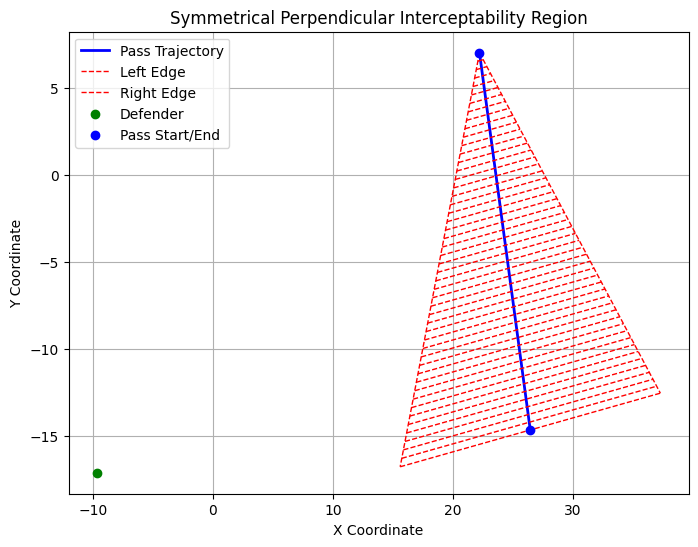

In [207]:
plot_interceptability_triangle(joined_df.iloc[50])

# Coordinate Normalization Evaluation

In [116]:
xt_table = pd.read_csv(XT_PLOT_PATH)

In [117]:
a = joined_df[joined_df['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
print(a.describe())

count    893.000000
mean       3.737207
std        2.249448
min        0.130206
25%        2.151520
50%        3.402867
75%        4.891735
max       21.157129
dtype: float64


In [118]:
first_period = joined_df[joined_df['matchPeriod'] == 1]
second_period = joined_df[joined_df['matchPeriod'] == 2]
a = first_period[first_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = second_period[second_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('First half')
display(a.describe())
print('Second half')
display(b.describe())

First half


count    517.000000
mean       3.514652
std        2.085332
min        0.130206
25%        2.085100
50%        3.284709
75%        4.585417
max       21.157129
dtype: float64

Second half


count    376.000000
mean       4.043221
std        2.426979
min        0.227633
25%        2.196651
50%        3.678401
75%        5.313445
max       16.513037
dtype: float64

In [119]:
first_period = joined_df[joined_df['matchPeriod'] == 1]
second_period = joined_df[joined_df['matchPeriod'] == 2]
a = first_period[first_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = second_period[second_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('First half')
display(a.describe())
print('Second half')
display(b.describe())

First half


count    517.000000
mean       3.514652
std        2.085332
min        0.130206
25%        2.085100
50%        3.284709
75%        4.585417
max       21.157129
dtype: float64

Second half


count    376.000000
mean       4.043221
std        2.426979
min        0.227633
25%        2.196651
50%        3.678401
75%        5.313445
max       16.513037
dtype: float64

In [120]:
extrapolated = joined_df[joined_df['extrapolated']]
not_extrapolated = joined_df[~joined_df['extrapolated']]
a = extrapolated[extrapolated['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = not_extrapolated[not_extrapolated['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Extrapolated')
display(a.describe())
print('Not Extrapolated')
display(b.describe())

Extrapolated


count    99.000000
mean      4.216838
std       2.586048
min       0.386822
25%       2.137555
50%       3.893010
75%       5.429100
max      13.305496
dtype: float64

Not Extrapolated


count    794.000000
mean       3.677404
std        2.198397
min        0.130206
25%        2.152629
50%        3.378977
75%        4.747816
max       21.157129
dtype: float64

In [121]:
selected_pass = joined_df.sort_values(by = 'dxt', ascending = False).iloc[:23]
selected_pass = selected_pass[selected_pass['responsibility'] > 0]

In [122]:
selected_pass

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,tracking.is_self,tracking.is_teammate,responsibility
frame,,,,,,,,,,,,,,,,,,,,
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,7604,-50.61,-3.05,0.0,False,False,False,0.428261
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,16320,-45.03,-13.34,0.0,False,False,False,0.461204
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,11516,-45.92,-4.00,0.0,False,False,False,0.893808
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,11606,-44.89,1.37,0.0,False,False,False,0.763351


In [123]:
selected_pass.to_csv('high_dxt_pass.csv')

In [124]:
top_bot = joined_df[joined_df['play_direction'] == 'TOP_TO_BOTTOM']
bot_top = joined_df[joined_df['play_direction'] == 'BOTTOM_TO_TOP']
a = top_bot[top_bot['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = bot_top[bot_top['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Top to Bottom')
display(a.describe())
print('Bottom to Top')
display(b.describe())

Top to Bottom


count    402.000000
mean       3.739519
std        2.342433
min        0.130206
25%        2.125241
50%        3.358943
75%        4.985521
max       21.157129
dtype: float64

Bottom to Top


count    491.000000
mean       3.735314
std        2.172766
min        0.175085
25%        2.154688
50%        3.461547
75%        4.862048
max       16.513037
dtype: float64